# 1. Data Extraction

#### **Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import calibration
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
import warnings

### Downloading raw dataset into pandas dataframe 'df'

In [2]:
import pandas as pd

df = pd.read_csv("FINAL_PROJECT_ATHOME_DATASET.csv",sep=",") # use sep="," for coma separation. 
df.head()


,Store name,Address,States,Region,City,Zip_code,LAT,LNG,Instore,Pickup_Curbside,...,h_income_$25k,h_income_$45k,h_income_$60k,h_income_$100k,h_income_$150k,h_income_>$200k,Sales_2017,Sales_2018,Sales_2019,Sales_2020
0,Alabama Hoover,5501 Grove Blvd Hoover AL,AL,South,Hoover,35226,33.40,-86.85,1,1,...,1723.0,1195.0,3150.0,2595.0,1306.0,972.0,7549331.524,9004223.693,9268893.936,8366741.482
1,Alabama Hunstville,1401 Memorial Pkwy NW Huntsville AL,AL,South,Huntsville,35816,34.74,-86.63,1,1,...,1527.0,531.0,816.0,282.0,19.0,25.0,7293928.339,8002360.109,8698868.035,8332970.486
2,Alabama Mobile,312 Schillinger Rd Mobile AL,AL,South,Mobile,36608,30.70,-88.30,1,1,...,3334.0,1794.0,2739.0,1401.0,582.0,919.0,8115437.434,7444256.141,7386252.682,7007691.989
3,Alabama Montgomery,1500 Eastdale Mall Montgomery AL,AL,South,Montgomery,36117,32.37,-86.14,1,1,...,4106.0,2438.0,5475.0,3103.0,1024.0,1233.0,6167703.142,5232813.235,4917968.035,4244686.891
4,Alabama Trussville,5036 Pinnacle Square AL 35235,AL,South,Trussville,35235,33.63,-86.66,1,1,...,2278.0,1552.0,1851.0,861.0,219.0,52.0,4896069.422,7265699.021,7337760.134,6450018.768


In [3]:
#checking the name of the columns imported from the dataset
df.columns

Index(['Store name', 'Address', 'States', 'Region', 'City', 'Zip_code', 'LAT',
       'LNG', 'Instore', 'Pickup_Curbside', 'Local_Delivery',
       'Total_Population_2017', 'Total_Population_2018',
       'Total_Population_2019', 'Zipcode_Pop_2013', 'Zipcode_Pop_2014',
       'Zipcode_Pop_2015', 'Current_Zipcode_Pop', 'Pop_density',
       'Pop_Growth_per year_from_2010_to_2020',
       'Predicted_Growth_per_year_from_2020_to_2025', 'Total_Pop growth_2017',
       'Total_ Pop_growth_2018', 'Total_ Pop_growth_2019',
       'House_Affordability_Index', 'Male', 'Female', 'Median_Age',
       'Male_median_Age', 'Female_Median_Age', 'median_Household_income',
       'Average_Home_Value', 'Median_Home_Value', 'White',
       'Blacks_African_american ', 'American_indian', 'Asian ',
       'Native_Hawaiian', 'other_race', 'two_or_more', 'Competition',
       'HOH_Owner_15-24', 'HOH_Owner_25-34', 'HOH_Owner_35-44',
       'HOH_Owner_45-54', 'HOH_Owner_55-64', 'HOH_Owner_65-74',
       'HOH_Owne

In [4]:
#checking the data types of the information contained within different columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 82 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Store name                                   219 non-null    object 
 1   Address                                      219 non-null    object 
 2   States                                       219 non-null    object 
 3   Region                                       219 non-null    object 
 4   City                                         219 non-null    object 
 5   Zip_code                                     219 non-null    int64  
 6   LAT                                          219 non-null    float64
 7   LNG                                          219 non-null    float64
 8   Instore                                      219 non-null    int64  
 9   Pickup_Curbside                              219 non-null    int64  
 10  Lo

In [6]:
#obtaining descriptive statistics of the data within different columns
df.describe()

,Zip_code,LAT,LNG,Instore,Pickup_Curbside,Local_Delivery,Total_Population_2017,Total_Population_2018,Total_Population_2019,Zipcode_Pop_2013,...,h_income_$25k,h_income_$45k,h_income_$60k,h_income_$100k,h_income_$150k,h_income_>$200k,Sales_2017,Sales_2018,Sales_2019,Sales_2020
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,2.190000e+02,2.190000e+02,2.190000e+02,219.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,1.400000e+02,1.730000e+02,2.090000e+02,2.170000e+02
mean,52213.301370,36.931963,-90.601005,0.977169,0.995434,0.707763,8.922851e+05,8.994866e+05,9.069788e+05,34051.598174,...,2646.284404,1740.105505,3232.697248,1980.041284,761.247706,650.986239,9.264444e+06,9.331472e+06,9.157968e+06,8.062630e+06
std,24832.276093,4.963537,11.733903,0.149707,0.067574,0.455833,1.099875e+06,1.108225e+06,1.118139e+06,16373.995178,...,1303.152014,801.479210,1512.045899,1211.468916,655.749111,722.580868,3.365079e+06,3.575527e+06,3.191529e+06,2.243501e+06
min,2026.000000,26.200000,-122.500000,0.000000,0.000000,0.000000,6.153600e+04,6.263700e+04,6.334300e+04,4440.000000,...,132.000000,150.000000,382.000000,167.000000,0.000000,12.000000,2.108936e+06,4.622571e+05,2.452094e+06,3.495747e+06
25%,32409.500000,32.985000,-96.915000,1.000000,1.000000,0.000000,2.510990e+05,2.553200e+05,2.596165e+05,21795.000000,...,1815.500000,1177.000000,2197.500000,1061.000000,320.500000,202.500000,7.187354e+06,7.053578e+06,6.976998e+06,6.450019e+06
50%,48315.000000,37.540000,-87.940000,1.000000,1.000000,1.000000,5.062240e+05,5.063530e+05,5.064710e+05,32810.000000,...,2486.500000,1716.000000,3134.500000,1696.000000,591.500000,432.500000,8.749757e+06,9.113744e+06,9.117476e+06,7.886363e+06
75%,76178.500000,40.815000,-82.390000,1.000000,1.000000,1.000000,9.505370e+05,9.587000e+05,9.645820e+05,43615.000000,...,3448.250000,2278.500000,4189.750000,2595.000000,997.250000,842.500000,1.164657e+07,1.156175e+07,1.100851e+07,9.176975e+06
max,99336.000000,48.800000,-71.180000,1.000000,1.000000,1.000000,5.200821e+06,5.171960e+06,5.150233e+06,87690.000000,...,6653.000000,4126.000000,8539.000000,5985.000000,3881.000000,5433.000000,1.753889e+07,2.200325e+07,1.968226e+07,1.492496e+07


In [7]:
#creating a copy(df1) of the dataframe (df) to avoid permanent changes on the original one
df1 = df.copy()
df1.head(10)

,Store name,Address,States,Region,City,Zip_code,LAT,LNG,Instore,Pickup_Curbside,...,h_income_$25k,h_income_$45k,h_income_$60k,h_income_$100k,h_income_$150k,h_income_>$200k,Sales_2017,Sales_2018,Sales_2019,Sales_2020
0,Alabama Hoover,5501 Grove Blvd Hoover AL,AL,South,Hoover,35226,33.40,-86.85,1,1,...,1723.0,1195.0,3150.0,2595.0,1306.0,972.0,7.549332e+06,9.004224e+06,9.268894e+06,8.366741e+06
1,Alabama Hunstville,1401 Memorial Pkwy NW Huntsville AL,AL,South,Huntsville,35816,34.74,-86.63,1,1,...,1527.0,531.0,816.0,282.0,19.0,25.0,7.293928e+06,8.002360e+06,8.698868e+06,8.332970e+06
2,Alabama Mobile,312 Schillinger Rd Mobile AL,AL,South,Mobile,36608,30.70,-88.30,1,1,...,3334.0,1794.0,2739.0,1401.0,582.0,919.0,8.115437e+06,7.444256e+06,7.386253e+06,7.007692e+06
3,Alabama Montgomery,1500 Eastdale Mall Montgomery AL,AL,South,Montgomery,36117,32.37,-86.14,1,1,...,4106.0,2438.0,5475.0,3103.0,1024.0,1233.0,6.167703e+06,5.232813e+06,4.917968e+06,4.244687e+06
4,Alabama Trussville,5036 Pinnacle Square AL 35235,AL,South,Trussville,35235,33.63,-86.66,1,1,...,2278.0,1552.0,1851.0,861.0,219.0,52.0,4.896069e+06,7.265699e+06,7.337760e+06,6.450019e+06
5,Arizona Gilbert,1891 Williams Field Rd,AZ,Southwest,Gilbert,85295,33.31,-111.74,1,1,...,1375.0,1576.0,3210.0,3772.0,819.0,799.0,4.109812e+06,1.353449e+07,1.416938e+07,1.164948e+07
6,Arizona Mesa,1944 S Greenfield Rd Mesa AZ,AZ,Southwest,Mesa,85206,33.40,-111.72,1,1,...,3505.0,2010.0,3248.0,1608.0,201.0,324.0,1.163626e+07,9.832031e+06,9.957737e+06,8.206899e+06
7,Arizona Peoria,10140 N 91st Ave Peoria AZ,AZ,Southwest,Peoria,85345,33.57,-112.25,1,1,...,4987.0,2867.0,5113.0,2029.0,300.0,144.0,8.960468e+06,1.012184e+07,1.134251e+07,1.019732e+07
8,Arizona Phoenix,12025 N 32nd St Phoenix AZ,AZ,Southwest,Phoenix,85028,33.57,-112.00,1,1,...,1125.0,779.0,1694.0,1619.0,943.0,853.0,1.008229e+07,1.143571e+07,1.063100e+07,8.185220e+06
9,Arizona Prescott,1801 East State Route 69 Prescott AZ,AZ,Southwest,Prescott,86301,34.62,-112.41,1,0,...,2068.0,1728.0,1730.0,791.0,309.0,237.0,6.312886e+06,6.935729e+06,6.737469e+06,5.736930e+06


# 3. Data Visualization

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Dist_plot to show variation in values of Sales_2020')

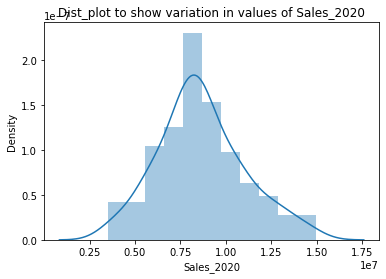

In [44]:
# dist_plot below explains our variability in the target variable 'charges'. 
ax = plt.axes()
sns.distplot(df["Sales_2020"], ax=ax)
ax.set_title('Dist_plot to show variation in values of Sales_2020')

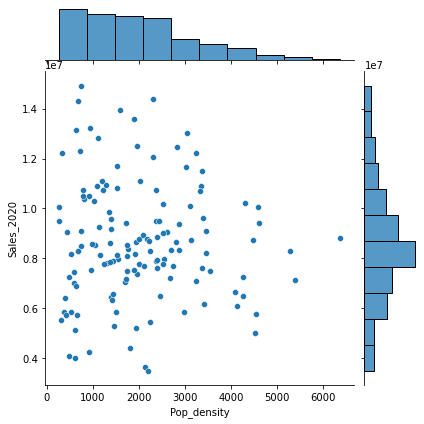

In [39]:
# 'Joint_plot to show correlation between age & charges'
sns.jointplot(x=df['Pop_density'],y=df['Sales_2020'])

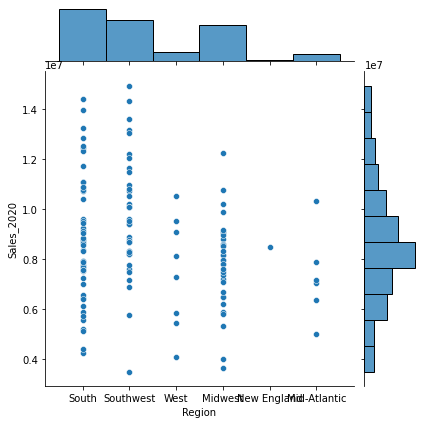

In [43]:
# 'Joint_plot to show correlation between age & charges'
sns.jointplot(x=df['Region'],y=df['Sales_2020'])

#### Above we can find the data distribution among different areas

In [11]:
df=df.dropna()

In [12]:
df1=df.dropna()

Then, we continue with this analysis by dividing X and Y with Y having our target variable 'Sales_2020':

In [14]:
X = df[['Zip_code',
       'LAT', 'LNG','Instore', 'Pickup_Curbside',
       'Local_Delivery', 'Total_Population_2017', 'Total_Population_2018',
       'Total_Population_2019', 'Zipcode_Pop_2013', 'Zipcode_Pop_2014',
       'Zipcode_Pop_2015', 'Current_Zipcode_Pop', 'Pop_density', 'Total_Pop growth_2017',
       'Total_ Pop_growth_2018', 'Total_ Pop_growth_2019',
       'House_Affordability_Index', 'Male', 'Female', 'Median_Age',
       'Male_median_Age', 'Female_Median_Age', 'White',
       'Blacks_African_american ', 'American_indian', 'Asian ',
       'Native_Hawaiian', 'other_race', 'two_or_more', 'Competition',
       'HOH_Owner_15-24', 'HOH_Owner_25-34', 'HOH_Owner_35-44',
       'HOH_Owner_45-54', 'HOH_Owner_55-64', 'HOH_Owner_65-74',
       'HOH_Owner_75-84', 'HOH_Owner_85_Plus', 'HOH_Owner_Total',
       'HOH_Renter_15-24', 'HOH_Renter_25-34', 'HOH_Renter_35-44',
       'HOH_Renter_45-54', 'HOH_Renter_55-64', 'HOH_Renter_65-74',
       'HOH_Renter_75-84', 'HOH_Renter_85_Plus', 'HOH_Renter_Total',
       'Family_Households', 'Singles_Guardian', 'Singles',
       'Singles_with_Roomates', 'Houses_built_2010_0r_later',
       'Studio_Apartment', '1_Bedroom', '2_Bedroom', '3+_Bedroom',
       'Housing_units', 'Occupied_Housing_Units', 'Wealth_Index',
       'h_income_<$25k', 'h_income_$25k', 'h_income_$45k', 'h_income_$60k',
       'h_income_$100k', 'h_income_$150k', 'h_income_>$200k', 'Sales_2017',
       'Sales_2018', 'Sales_2019']]
Y = df['Sales_2020']


In [15]:
df['Region'].value_counts()

South           50
Southwest       39
Midwest         34
West             8
Mid-Atlantic     6
New England      1
Name: Region, dtype: int64

In [16]:
# Replacing string values to numbers
df1['Region'] = df1['Region'].apply({'South':0,'Southwest':1,'Midwest':2,'West':3,'Mid-Atlantic':4, 'New England':5}.get) 


In [17]:
X = df1[['Region','Zip_code',
       'LAT', 'LNG','Instore', 'Pickup_Curbside',
       'Local_Delivery', 'Total_Population_2017', 'Total_Population_2018',
       'Total_Population_2019', 'Zipcode_Pop_2013', 'Zipcode_Pop_2014',
       'Zipcode_Pop_2015', 'Current_Zipcode_Pop', 'Pop_density', 'Total_Pop growth_2017',
       'Total_ Pop_growth_2018', 'Total_ Pop_growth_2019',
       'House_Affordability_Index', 'Male', 'Female', 'Median_Age',
       'Male_median_Age', 'Female_Median_Age', 'White',
       'Blacks_African_american ', 'American_indian', 'Asian ',
       'Native_Hawaiian', 'other_race', 'two_or_more', 'Competition',
       'HOH_Owner_15-24', 'HOH_Owner_25-34', 'HOH_Owner_35-44',
       'HOH_Owner_45-54', 'HOH_Owner_55-64', 'HOH_Owner_65-74',
       'HOH_Owner_75-84', 'HOH_Owner_85_Plus', 'HOH_Owner_Total',
       'HOH_Renter_15-24', 'HOH_Renter_25-34', 'HOH_Renter_35-44',
       'HOH_Renter_45-54', 'HOH_Renter_55-64', 'HOH_Renter_65-74',
       'HOH_Renter_75-84', 'HOH_Renter_85_Plus', 'HOH_Renter_Total',
       'Family_Households', 'Singles_Guardian', 'Singles',
       'Singles_with_Roomates', 'Houses_built_2010_0r_later',
       'Studio_Apartment', '1_Bedroom', '2_Bedroom', '3+_Bedroom',
       'Housing_units', 'Occupied_Housing_Units', 'Wealth_Index',
       'h_income_<$25k', 'h_income_$25k', 'h_income_$45k', 'h_income_$60k',
       'h_income_$100k', 'h_income_$150k', 'h_income_>$200k', 'Sales_2017',
       'Sales_2018', 'Sales_2019']]
Y = df1['Sales_2020']

# Descriptive/Predictive Analytics

Here, we got training and testing models divided by 80% in training model and 20% in testing model

In [18]:
df1=df1.dropna()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


#### importing linear regression to fit our training model here

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)


LinearRegression()

#### Applied OLS regression for estimating the unknown parameters in our linear regression model

In [35]:
import statsmodels.api as sm
from patsy import dmatrices
Y2,X2 = dmatrices('Pop_density ~ Sales_2020', data=df1, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=sm.OLS(Y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Region', 'Zip_code', 'LAT', 'LNG', 'Instore', 'Pickup_Curbside',
       'Local_Delivery', 'Total_Population_2017', 'Total_Population_2018',
       'Total_Population_2019', 'Zipcode_Pop_2013', 'Zipcode_Pop_2014',
       'Zipcode_Pop_2015', 'Current_Zipcode_Pop', 'Pop_density',
       'Total_Pop growth_2017', 'Total_ Pop_growth_2018',
       'Total_ Pop_growth_2019', 'House_Affordability_Index', 'Male', 'Female',
       'Median_Age', 'Male_median_Age', 'Female_Median_Age', 'White',
       'Blacks_African_american ', 'American_indian', 'Asian ',
       'Native_Hawaiian', 'other_race', 'two_or_more', 'Competition',
       'HOH_Owner_15-24', 'HOH_Owner_25-34', 'HOH_Owner_35-44',
       'HOH_Owner_45-54', 'HOH_Owner_55-64', 'HOH_Owner_65-74',
       'HOH_Owner_75-84', 'HOH_Owner_85_Plus', 'HOH_Owner_Total',
       'HOH_Renter_15-24', 'HOH_Renter_25-34', 'HOH_Renter_35-44',
       'HOH_Renter_45-54', 'HOH_Renter_55-64', 'HOH_Renter_65-74',
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Sales_2020   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              500.4
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                    1.56e-73
Time:                        20:52:25   Log-Likelihood:                         -1973.8
No. Observations:                 138   AIC:                                      4088.
Df Residuals:                      68   BIC:                                      4293.
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Region                     -7.318e+04   8.17e+04     -0.895      0.374   -2.36e+05    8.99e+04
Zip_code                       6.8688      7.868      0.873      0.386      -8.832      22.570
LAT                         2.015e+04   2.56e+04      0.788      0.433   -3.09e+04    7.12e+04
LNG                         1.041e+04   1.62e+04      0.644      0.522   -2.18e+04    4.27e+04
Instore                    -3.817e+05   3.77e+05     -1.012      0.315   -1.13e+06    3.71e+05
Pickup_Curbside            -7.551e+05   7.71e+05     -0.979      0.331   -2.29e+06    7.84e+05
Local_Delivery             -5.299e+04   2.13e+05     -0.249      0.804   -4.78e+05    3.72e+05
Total_Population_2017        -59.9429     34.755     -1.725      0.089    -129.296       9.411
Total_Population_2018        122.8592     69.149      1.777      0.080     -15.126     260.844
Total_Population_2019        -62.8096     35.243     -1.782      0.079    -133.136       7.517
Zipcode_Pop_2013            -125.3695    162.022     -0.774      0.442    -448.680     197.941
Zipcode_Pop_2014             224.7220    212.391      1.058      0.294    -199.097     648.541
Zipcode_Pop_2015             -82.5001     96.366     -0.856      0.395    -274.796     109.796
Current_Zipcode_Pop           -0.0876      5.514     -0.016      0.987     -11.091      10.916
Pop_density                   42.8114     82.466      0.519      0.605    -121.747     207.369
Total_Pop growth_2017       3.504e+07    1.4e+07      2.504      0.015    7.11e+06     6.3e+07
Total_ Pop_growth_2018     -6.247e+07   2.43e+07     -2.573      0.012   -1.11e+08    -1.4e+07
Total_ Pop_growth_2019      3.711e+07   2.64e+07      1.408      0.164   -1.55e+07    8.97e+07
House_Affordability_Index   3811.4336   2611.947      1.459      0.149   -1400.625    9023.493
Male                         149.4959    216.459      0.691      0.492    -282.442     581.433
Female                         7.8768      5.187      1.518      0.134      -2.475      18.228
Median_Age                 -7.719e+04   2.01e+05     -0.384      0.702   -4.78e+05    3.24e+05
Male_median_Age             5.352e+04    1.3e+05      0.413      0.681   -2.05e+05    3.12e+05
Female_Median_Age           3.925e+04   1.09e+05      0.360      0.720   -1.78e+05    2.57e+05
White                       -184.6711    124.335     -1.485      0.142    -432.778      63.436
Blacks_African_american     -110.5258    119.223     -0.927      0.357    -348.432     127.381
American_indian             -210.5921    176.857     -1.191      0.238    -563.506     142.322
Asian                       -132.4624    136.791     -0.968      0.336    -405.425     140.500
Native_Hawaiian             -953.0535  

In [23]:
X1 = df1[['Region','Pop_density', 'Median_Age','median_Household_income','Median_Home_Value']]
Y1 = df1['Sales_2020']

In [24]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.4)
lm1 = LinearRegression()
lm1.fit(X1_train, Y1_train)

LinearRegression()

The model is fitted. We will create a new data-frame to present estimated coefficients obtained by our model. 

<AxesSubplot:>

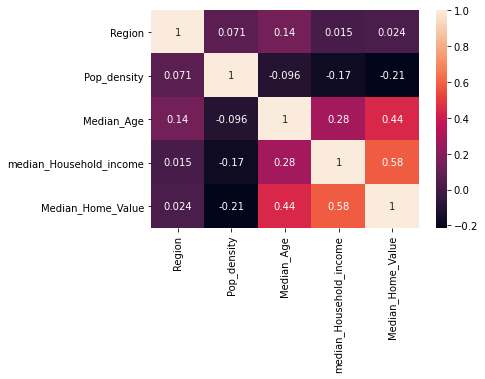

In [34]:
sns.heatmap(X1.corr(),annot=True)
# print(df1)

In [25]:
print(lm1.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

print(coeff_df)

7873045.115846142
                  Coefficient
Region            2322.674362
Zip_code            17.764113
LAT             -48553.520580
LNG              40162.048265
Instore           3784.291772
...                       ...
h_income_$150k    -428.545358
h_income_>$200k   -233.611246
Sales_2017           0.060833
Sales_2018          -0.102145
Sales_2019           0.812659

[72 rows x 1 columns]


In [26]:
#checking values out for our first 5 predicted values from test dataset
predictions = lm.predict(X_test)
predictions[0:5]

array([ 4930674.19623574,  6750087.39083216,  9563832.10913357,
       13133179.84256161,  9566860.02213978])

##### Plotting our predicted values againt test dataset to observe that most of our values fit exactly as in our trainng dataset

Text(0, 0.5, 'Predicted Y')

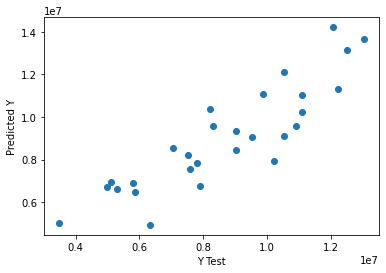

In [37]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Below is the MAE and RMSE values for our Train and Test models:

In [36]:
#importing from external py file

def regress():
                print('Model training and evaluating\n\n')
                variables = ['Region','Pop_density', 'Median_Age','median_Household_income','Median_Home_Value']
                X = df1[variables]
                sc = StandardScaler()
                X = sc.fit_transform(X) 
                Y = df1['Sales_2020']
                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

                #train model
                regressor = ExtraTreesRegressor(n_estimators = 200)
                regressor.fit(X_train,y_train)

                #prediction and evaluation
                y_train_pred = regressor.predict(X_train)
                y_test_pred = regressor.predict(X_test)

                print('ExtraTreesRegressor evaluating result:')
                print("Train MAE: ", sklearn.metrics.mean_absolute_error(y_train, y_train_pred))
                print("Train RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_train_pred)))
                print("Test MAE: ", sklearn.metrics.mean_absolute_error(y_test, y_test_pred))
                print("Test RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_test_pred)))
regress()

Model training and evaluating


ExtraTreesRegressor evaluating result:
Train MAE:  2.1754848686131564e-08
Train RMSE:  2.549608143157377e-08
Test MAE:  2351862.424648215
Test RMSE:  2933480.095023728


### - Hence, lower values of MAE and RMSE for our training models gives us the idea that the prediction model is pretty good. However, test model does not testifies the same. 
### - Therefore, we can conclude that for our predictive model, the predictions are quite accurate. But for the values which are not in the range (outliers), the accuracy in result outcome of predicted Sales may be affected which will be taken care of with the increasing entries in our datasets over time.

In [29]:
X1.columns

Index(['Region', 'Pop_density', 'Median_Age', 'median_Household_income',
       'Median_Home_Value'],
      dtype='object')

In [30]:
# Predict charges for new entry 



Region=float(input("Please enter the region ('South':0,'Southwest':1,'Midwest':2,'West':3,'Mid-Atlantic':4, 'New England':5):  "))
Pop_density=float(input("Pop_density (eg.: 1758):       "))
Median_Age=float(input("Please enter Median_Age (eg.: 39):     "))
median_Household_income=float(input("median_Household_income (eg.: 83644):      "))
Median_Home_Value=float(input("Median_Home_Value (eg.: 240500):       "))

data = {'Region' : Region,'Pop_density' : Pop_density,'Median_Age' : Median_Age,'median_Household_income' : median_Household_income,'Median_Home_Value' : Median_Home_Value}
index = [1]

Piyush_df = pd.DataFrame(data,index)
Piyush_df

Please enter the region ('South':0,'Southwest':1,'Midwest':2,'West':3,'Mid-Atlantic':4, 'New England':5):  1
Pop_density (eg.: 1758):       2131
Please enter Median_Age (eg.: 39):     32
median_Household_income (eg.: 83644):      56756
Median_Home_Value (eg.: 240500):       213239


,Region,Pop_density,Median_Age,median_Household_income,Median_Home_Value
1,1.0,2131.0,32.0,56756.0,213239.0


### Hence, the predicted value of 'Sales_2020' as per our logistic regression model and given input data is:

In [32]:
predict_piyush = lm1.predict(Piyush_df)
print("Predicted value of 'Sales_2020' (in USD) : ", predict_piyush)

Predicted value of 'Sales_2020' (in USD) :  [8425110.02133308]


## Conclusion

- Here we will include our interpretations for the questions posed in the data selection assignment. We observe that our response variable ‘Sales 2020’ representing total revenue for an individual store depends directly upon our predictor variables. 

- For our predictive model, we conclude that the predictions are quite accurate. But for the values which are not in the range (outliers), the accuracy in result outcome of predicted insurance cost may be affected which will be taken care of with the increasing entries in our datasets over time.
